In [ ]:
import gymnasium as gym
env = gym.make('Taxi-v3', render_mode='ansi')
env.reset()

print(env.render())

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




In [ ]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt


class QLearningAgent:
    def __init__(self, env, learning_rate, initial_epsilon, epsilon_decay, final_epsilon, discount_factor=0.95
                 ):
        self.env = env
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor

        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon

        # Initialize an empty dictionary of state-action values
        self.q_values = defaultdict(lambda: np.zeros(env.action_space.n))

    def get_action(self, obs) -> int:
        x = np.random.rand()
        if x < self.final_epsilon:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.q_values[obs])

    def update(self, obs, action, reward, terminated, next_obs):
        if not terminated:
            future_q_value = np.max(self.q_values[next_obs])
            self.q_values[obs][action] += self.learning_rate * \
                (reward + self.discount_factor *
                 future_q_value - self.q_values[obs][action])

    def decay_epsilon(self):
        """Decrease the exploration rate epsilon until it reaches its final value"""
        self.epsilon = max(self.final_epsilon,
                           self.epsilon - self.epsilon_decay)

In [ ]:
def train_agent(agent, env, episodes, eval_interval=100):
    rewards = []
    best_reward = -np.inf
    for i in range(episodes):
        obs, _ = env.reset()
        terminated = False
        truncated = False
        length = 0
        total_reward = 0

        while (terminated == False) and (truncated == False):

            action = agent.get_action(obs)
            next_obs, reward, terminated, truncated, _ = env.step(action)

            agent.update(obs, action, reward, terminated, next_obs)
            obs = next_obs
            length = length + 1
            total_reward += reward

        agent.decay_epsilon()
        rewards.append(total_reward)

        if i >= eval_interval:
            avg_return = np.mean(rewards[i - eval_interval: i])
            best_reward = max(avg_return, best_reward)
        if i % eval_interval == 0 and i > 0:

            print(f"Episode{i} -> best_reward={best_reward} ")
    return rewards

In [ ]:
episodes = 20000
learning_rate = 0.5
discount_factor = 0.95
initial_epsilon = 1
final_epsilon = 0
epsilon_decay = ((final_epsilon - initial_epsilon) / (episodes / 2))
env = gym.make('Taxi-v3', render_mode='ansi')
agent = QLearningAgent(env, learning_rate, initial_epsilon,
                       epsilon_decay, final_epsilon)

returns = train_agent(agent, env, episodes)

Episode100 -> best_reward=-234.13 
Episode200 -> best_reward=-111.98 
Episode300 -> best_reward=-33.17 
Episode400 -> best_reward=-16.24 
Episode500 -> best_reward=-6.43 
Episode600 -> best_reward=-3.21 
Episode700 -> best_reward=1.21 
Episode800 -> best_reward=3.22 
Episode900 -> best_reward=3.68 
Episode1000 -> best_reward=5.55 
Episode1100 -> best_reward=6.75 
Episode1200 -> best_reward=6.75 
Episode1300 -> best_reward=7.46 
Episode1400 -> best_reward=7.46 
Episode1500 -> best_reward=7.46 
Episode1600 -> best_reward=7.67 
Episode1700 -> best_reward=8.1 
Episode1800 -> best_reward=8.1 
Episode1900 -> best_reward=8.1 
Episode2000 -> best_reward=8.1 
Episode2100 -> best_reward=8.1 
Episode2200 -> best_reward=8.14 
Episode2300 -> best_reward=8.14 
Episode2400 -> best_reward=8.14 
Episode2500 -> best_reward=8.14 
Episode2600 -> best_reward=8.14 
Episode2700 -> best_reward=8.16 
Episode2800 -> best_reward=8.16 
Episode2900 -> best_reward=8.17 
Episode3000 -> best_reward=8.42 
Episode3100 

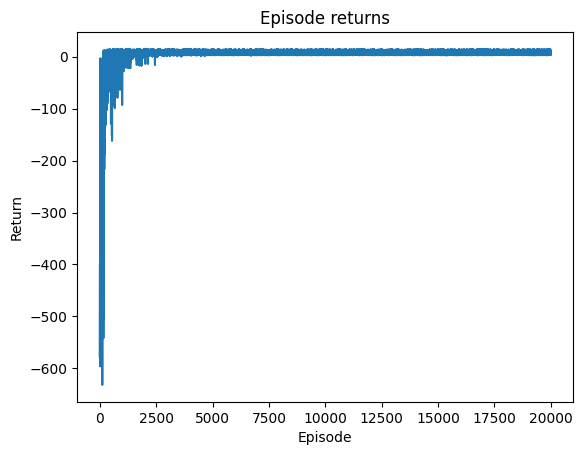

In [ ]:
def plot_returns(returns):
    plt.plot(np.arange(len(returns)), returns)
    plt.title('Episode returns')
    plt.xlabel('Episode')
    plt.ylabel('Return')
    plt.show()


plot_returns(returns)

In [ ]:
def run_agent(agent, env):
    agent.epsilon = 0
    obs, _ = env.reset()
    env.render()
    terminated = truncated = False

    while terminated == False and truncated == False:
        action = agent.get_action(obs)
        next_obs, _, terminated, truncated, _ = env.step(action)
        print(env.render())

        obs = next_obs


env = gym.make('Taxi-v3', render_mode='ansi')
run_agent(agent, env)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | :_:G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| 